<a href="https://colab.research.google.com/github/akashkau1224/Bitcoin-Price-Predictor/blob/main/Final_Project_Predicting_Bitcoin_Price_Movements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 5450 Term Project

### Predicting Bitcoin Price Movements: A Comprehensive Analysis Using Sentiment-Driven Reddit Data

Bitcoin is a trailblazer in the world of cryptocurrencies, drawing interest from traders, investors, and fans in equal measure. Because of how erratic Bitcoin values may be, there is increasing curiosity on the variables that affect its market fluctuations. Under the heading "Predicting Bitcoin Price Movements: A Comprehensive Analysis Using Sentiment-Driven Reddit Data," this term project delves into the complex dynamics of price movements of this virtual currency.

&nbsp;

Beyond being a decentralized digital currency, Bitcoin is significant because it has developed into a financial asset with significant return potential. Predicting changes in the price of Bitcoin is therefore essential for investors looking to maximize their trading methods. Furthermore, it is becoming more and more obvious how social media sentiment affects financial markets, which has led to the investigation of sites like Reddit to gain understanding of market sentiment.

&nbsp;

This project examines the mechanics of changes in the price of Bitcoin by using Reddit's extensive conversation archive to measure sentiment and evaluate how it relates to market patterns. Reddit's decision was a calculated one, mirroring the GameStop saga where social media discussions played a pivotal role in influencing stock prices, in which social media conversations significantly impacted stock prices. Our objective is to obtain significant insights about possible price changes by comprehending the mood that is expressed on Reddit.

![Reddit Image](https://analyticsdrift.com/wp-content/uploads/2022/08/Reddit-introduces-new-method-to-accept-crypto-payments.jpg)
&nbsp;

To identify patterns and trends in historical Bitcoin price data, the project uses a thorough process that starts with exploratory data analysis (EDA). We will discover whether Reddit's general interest affects the price of Bitcoin or not.

&nbsp;

Using ML methods, we will model the relationship between sentiment and Bitcoin prices and attempt to predict the price.

Based on historical data and sentiment variables taken from Reddit, the study investigates the effectiveness of the Random Forest Regressor, a robust ensemble learning technique, to forecast changes in the price of Bitcoin. Furthermore, Prophet, a time-series forecasting algorithm created by Facebook, is used in this project.

&nbsp;

This project aims to offer a comprehensive comprehension of the relationship between Reddit's mood and fluctuations in the price of Bitcoin. The analysis's insights will aid in the creation of predictive models, allowing bitcoin investors to make better decisions.

&nbsp;

This project will utilize cutting-edge analytical approaches to forecast changes in Bitcoin prices while also adding to the expanding body of information about the impact of social media opinion on the cryptocurrency market. In the end, the findings of this project may have consequences for market players negotiating the ever-changing landscape of digital assets.

# ![Bitcoin Image](https://i.pcmag.com/imagery/articles/015t2XCInYI4JmscpwIFyrH-1..v1634848953.jpg)


# Part I: Wrangling and Cleaning Data


## NOTE: We highly recommend not running these cells since the Colab will crash in Part II! You are welcome to do so but you will have to rerun part 2 seperately later.

## 1.1 Load Data from CSVs and Create Files

We begin by importing a few required packages


In [ ]:
%%capture
!apt update
!pip install kaggle
!pip install fasttext-langdetect
!pip install prophet
!pip install pandasql
!pip install sqlalchemy==1.4.46

In [ ]:
# Import required packages

import json
import pandas as pd
import pandasql as ps
from sqlalchemy import text as satext
import numpy as np
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import gdown
import matplotlib.dates as mdates
from numpy import ravel
from prophet import Prophet
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Mount google drive to download Kaggle datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

### Dataset 1: 'Reddit Comments Containing "Bitcoin" 2009 to 2019'
4M+ comments from Reddit that contain the word "bitcoin" from 2009 to 2019 collected from Google BigQuery.

In [ ]:
!!kaggle datasets download -d jerryfanelli/reddit-comments-containing-bitcoin-2009-to-2019

['Downloading reddit-comments-containing-bitcoin-2009-to-2019.zip to /content',
 '',
 '  0% 0.00/894M [00:00<?, ?B/s]',
 '  0% 1.00M/894M [00:00<08:42, 1.79MB/s]',
 '  0% 2.00M/894M [00:00<04:49, 3.23MB/s]',
 '  0% 4.00M/894M [00:00<02:33, 6.08MB/s]',
 '  1% 7.00M/894M [00:01<01:26, 10.8MB/s]',
 '  1% 9.00M/894M [00:01<01:24, 11.0MB/s]',
 '  1% 12.0M/894M [00:01<01:07, 13.7MB/s]',
 '  2% 14.0M/894M [00:01<01:04, 14.2MB/s]',
 '  2% 17.0M/894M [00:01<00:52, 17.4MB/s]',
 '  2% 19.0M/894M [00:01<01:16, 11.9MB/s]',
 '  2% 21.0M/894M [00:02<01:15, 12.2MB/s]',
 '  3% 23.0M/894M [00:02<01:09, 13.1MB/s]',
 '  3% 25.0M/894M [00:02<01:03, 14.4MB/s]',
 '  3% 27.0M/894M [00:02<01:05, 13.9MB/s]',
 '  3% 29.0M/894M [00:02<01:08, 13.2MB/s]',
 '  4% 33.0M/894M [00:02<00:53, 16.8MB/s]',
 '  4% 37.0M/894M [00:03<00:46, 19.3MB/s]',
 '  5% 41.0M/894M [00:03<00:42, 21.0MB/s]',
 '  5% 44.0M/894M [00:03<00:46, 19.2MB/s]',
 '  5% 48.0M/894M [00:03<00:42, 20.8MB/s]',
 '  6% 51.0M/894M [00:03<00:44, 19.7MB/s]',


### Dataset 2: 'Bitcoin Price (2014-2023)'
The Yahoo Finance Bitcoin Historical Data, spanning from 2014 to 2023


In [ ]:
!!kaggle datasets download -d arslanr369/bitcoin-price-2014-2023

['bitcoin-price-2014-2023.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [ ]:
!unzip /content/reddit-comments-containing-bitcoin-2009-to-2019.zip

Archive:  /content/reddit-comments-containing-bitcoin-2009-to-2019.zip
  inflating: bitcoin_reddit_all.csv  


In [ ]:
!unzip /content/bitcoin-price-2014-2023.zip

Archive:  /content/bitcoin-price-2014-2023.zip
replace BTC-USD.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Read into reddit_df
reddit_df = pd.read_csv('bitcoin_reddit_all.csv')

<ipython-input-10-98f48ba6a32f>:2: DtypeWarning: Columns (0,1,2,3,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit_df = pd.read_csv('bitcoin_reddit_all.csv')


Let's see the first few elements to get insight into the Reddit dataset. datetime is a datetime object for the time a comment was posted, date is the date a comment was posted, author is the author of a comment, subreddit is the subreddit the comment was posted on, created_utc is a unix timestamp of when the time was created, score is the number of upvotes and downvotes, controversiality is whether the post was given the controversial tag, and body is the text of the comment.

In [ ]:
reddit_df.head()

,Unnamed: 0,datetime,date,author,subreddit,created_utc,score,controversiality,body
0,0,2014-06-26 16:49:41,2014-06-26,HonorConnor,AskReddit,1.403801e+09,162.0,0.0,How do you feel about Bitcoin? I don't really ...
1,1,2014-05-17 23:30:36,2014-05-17,Talvoren,AskReddit,1.400369e+09,75.0,0.0,[The guy who blew a huge portion of his and hi...
2,2,2014-12-18 04:54:48,2014-12-18,ninjoe87,Outdoors,1.418878e+09,-4.0,0.0,Because you are a damn liar.\n\nFrom my other ...
3,3,2014-04-30 00:24:16,2014-04-30,fathergrigori54,tf2,1.398817e+09,13.0,0.0,This was the bitcoin hat guy that ACTUALLY del...
4,4,2014-07-07 16:06:21,2014-07-07,Draber-Bien,starcraft,1.404749e+09,19.0,0.0,I'm sure this is *good* for bitcoin


Now, we can also see some important info about the dataset

In [ ]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4309244 entries, 0 to 4309243
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        object 
 1   datetime          object 
 2   date              object 
 3   author            object 
 4   subreddit         object 
 5   created_utc       float64
 6   score             float64
 7   controversiality  float64
 8   body              object 
dtypes: float64(3), object(6)
memory usage: 295.9+ MB


In [ ]:
# Read into price_df
price_df = pd.read_csv("BTC-USD.csv")

Let's see the first few elements to get insight into the Bitcoin price dataset. Date is the date when the prices were recorded, Open is the opening price, High is the highest price during that day, Low is the lowest price during that day, Close is the closing price of that day, Adj Close is adjusted closing price, and Volume is the quantity of Bitcoin traded that day.

In [ ]:
price_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Now, we can also see some important info about the dataset

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj Close  3228 non-null   float64
 6   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 176.7+ KB


## 1.2 Sentiment Analysis on Reddit Data
In order to understand the tone of conversations about Bitcoin, we conduct sentiment analysis on each of the Reddit comments in the data. Because of the size and complexity of the reddit_df dataset, we choose to use the lightweight NLP library TextBlob in order to maximize efficiency. TextBlob is a better choice for big datasets than NLTK because it offers a simple and fast method of analyzing sentiment. We store the sentiment analysis polarity in a new column called sentiment_polarity.

Note: This might take a while to run

In [ ]:
from textblob import TextBlob
# Drop unnecessary columns that might affect speed
reddit_df = reddit_df.drop(['author', 'created_utc', 'Unnamed: 0', 'date', 'subreddit'], axis=1)
reddit_df.dropna(inplace=True)
reddit_df.reset_index(drop=True, inplace=True)

# Apply sentiment analysis using TextBlob
reddit_df['sentiment_polarity'] = reddit_df['body'].apply(lambda text: TextBlob(text).sentiment.polarity)

Now let's take a look at reddit_df

In [ ]:
reddit_df

,datetime,score,controversiality,body,sentiment_polarity
0,2014-06-26 16:49:41,162.0,0.0,How do you feel about Bitcoin? I don't really ...,0.250000
1,2014-05-17 23:30:36,75.0,0.0,[The guy who blew a huge portion of his and hi...,0.200000
2,2014-12-18 04:54:48,-4.0,0.0,Because you are a damn liar.\n\nFrom my other ...,-0.232812
3,2014-04-30 00:24:16,13.0,0.0,This was the bitcoin hat guy that ACTUALLY del...,0.000000
4,2014-07-07 16:06:21,19.0,0.0,I'm sure this is *good* for bitcoin,0.600000
...,...,...,...,...,...
4243537,2019-03-16 16:23:45,-1.0,0.0,Put 10% of those savings in Bitcoin.,0.000000
4243538,2019-03-20 22:14:09,-1.0,1.0,Litecoin is another shitcoin used for testing ...,0.000000
4243539,2019-03-23 21:08:12,-1.0,0.0,Hahahahaha Bitcoin dudes are such dumbasses,0.100000
4243540,2019-03-24 19:05:11,-1.0,0.0,luke sees bitcoin as a collaborative effort be...,0.080000


Great! We will save this to CSV to avoid long waiting times, then we can rerun next cell later if session crashes.

In [ ]:
reddit_df.to_csv('/content/drive/My Drive/sentiment_reddit.csv', index=False)

In [ ]:
reddit_df.to_csv('/content/drive/MyDrive/CIS_5450_Project_Files/sentiment_reddit.csv', index=False)

## 1.3 Checkpoint 1


In [ ]:
reddit_df = pd.read_csv('/content/drive/My Drive/sentiment_reddit.csv')

## 1.4 Clean Datasets

We now clean the datasets

Remove hour/minute/second from datetime column

In [ ]:
reddit_df['datetime'] = pd.to_datetime(reddit_df['datetime']).dt.floor('D')

Add a column indicating whether opening price increases or decreases next day

In [ ]:
price_df['movement'] = np.nan
price_df['movement'][(price_df['Open'] > price_df['Open'].shift(-1))] = 'down'
price_df['movement'][(price_df['Open'] < price_df['Open'].shift(-1))] = 'up'
price_df['movement'] = price_df['movement'].astype("string")

<ipython-input-9-96a498f4bbb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['movement'][(price_df['Open'] > price_df['Open'].shift(-1))] = 'down'


Drop null values

In [ ]:
# Drop null values
reddit_df.dropna(inplace=True)
price_df.dropna(inplace=True)
reddit_df.reset_index(inplace=True, drop=True)
price_df.reset_index(inplace=True, drop=True)

Convert the Date column to Datetime type

In [ ]:
# Convert Date column to Datetime
price_df['Date'] = pd.to_datetime(price_df['Date'])

We will add a column called Peak to peak, which represents the difference between the highest and lowest prices on a day. We will use this as a feature in our models later.

In [ ]:
price_df['Peak to peak'] = price_df['High'] - price_df['Low']

In [ ]:
price_df

,Date,Open,High,Low,Close,Adj Close,Volume,movement,Peak to peak
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,down,15.752014
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,down,43.755981
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,down,43.302978
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,up,33.412994
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,down,19.244995
...,...,...,...,...,...,...,...,...,...
3222,2023-07-14,31474.720703,31582.253906,29966.386719,30334.068359,30334.068359,20917902660,down,1615.867187
3223,2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756,down,144.318359
3224,2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470,down,347.890625
3225,2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074,down,650.617188


## 1.6 Merging Datasets

We now merge the two datasets by date

In [ ]:
merged_df = pd.merge(price_df, reddit_df, left_on='Date', right_on='datetime', how='inner')
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,movement,Peak to peak,datetime,score,controversiality,body,sentiment_polarity
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,down,15.752014,2014-09-17,1.0,0.0,"Er, you might want to check your logic circuit...",-0.024861
1,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,down,15.752014,2014-09-17,1.0,0.0,"Yeah, in a few months we'll see a story about ...",-0.187500
2,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,down,15.752014,2014-09-17,7.0,0.0,A few things. Some of them genuinely still be...,-0.220000
3,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,down,15.752014,2014-09-17,1.0,0.0,"Me? I've never used bitcoin, but it's worth tr...",0.300000
4,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,down,15.752014,2014-09-17,2.0,0.0,They can stop actively helping with adoption t...,0.196537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515951,2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112,down,165.512207,2019-12-31,-1.0,0.0,People thought the same about Bitcoin,0.000000
3515952,2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112,down,165.512207,2019-12-31,-1.0,0.0,"\^\^\n\n""Look, I love bitcoin as much as the n...",0.357143
3515953,2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112,down,165.512207,2019-12-31,-1.0,0.0,"So you what?\nBuy low, sell high and play on t...",0.120000
3515954,2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112,down,165.512207,2019-12-31,-1.0,0.0,"Yayyyy bitcoin outperformed Gold ... awesome, ...",0.244373


Now group columns representing the same day together. In the score column, add together all of the scores for the day, in the controversiality column, average the controversialities of the day, in the body column, count the number of comments for the day, and in the sentiment_polarity column, average the sentiment polarities of the day.

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Group by 'Date' and aggregate using various functions
merged_df = merged_df.groupby('Date').agg({
    'Open': 'first',
    'High': 'first',
    'Low': 'first',
    'Close': 'first',
    'Adj Close': 'first',
    'Volume': 'first',
    'movement': 'first',
    'Peak to peak': 'first',
    'score': 'sum',
    'controversiality': 'mean',
    'body': 'count',
    'sentiment_polarity': 'mean'
}).reset_index()

merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,movement,Peak to peak,score,controversiality,body,sentiment_polarity
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,down,15.752014,4662.0,0.000000,1124,0.093944
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,down,43.755981,4121.0,0.000000,1394,0.097627
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,down,43.302978,4570.0,0.000000,1483,0.094353
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,up,33.412994,2784.0,0.000000,1011,0.106974
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,down,19.244995,2609.0,0.000000,945,0.109440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996,up,173.595215,3250.0,0.028634,908,0.092968
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026,up,112.135743,3663.0,0.043038,790,0.096074
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,22445257702,up,234.083008,3534.0,0.045652,920,0.086152
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,22874131672,down,178.516114,5426.0,0.044280,1084,0.097313


## 1.7 Checkpoint 2

In [ ]:
price_df.to_csv('/content/drive/My Drive/cleaned_price.csv', index=False)

In [ ]:
merged_df.to_csv('/content/drive/My Drive/cleaned_merged.csv', index=False)

After you reach this point, reload the colab.
# Part 2: Exploratory Data Analysis (EDA)


We begin an exploratory data analysis (EDA) with a focus on the merged dataframes in this section. Our goal is to identify important trends, patterns, and insights hidden in the dynamics of Bitcoin pricing. We aim to reveal the underlying structure of the price data by using a variety of statistical and visual techniques to spot possible outliers and general trends. This EDA is an essential part of our project since it gives us a thorough grasp of Bitcoin's past price fluctuations.

## 2.0 Reload Data

Since the colab often runs out of RAM by this point, we reload the saved data here.

In [ ]:
# (Re)import packages
!pip install prophet
!pip install pandasql
!pip install sqlalchemy==1.4.46

import json
import pandas as pd
import pandasql as ps
from sqlalchemy import text as satext
import numpy as np
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import gdown
import matplotlib.dates as mdates
from numpy import ravel
from prophet import Prophet
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=9b552c88852fa338c7c5af7a0911a7be4854753e5c3da500c1aa515f65ccf3c9
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.46 which is incompatible.


In [ ]:
price_df = pd.read_csv('https://drive.google.com/uc?id=10dh6NGQitAl511GlIBhTO4ZyYy-v59PO')

In [ ]:
# Since merged_df is a bigger file, we will have to download it instead:
gdown.download('https://drive.google.com/uc?id=1-0rVxRfA1EcqTd7Ws8pB6QbRrPfDe2FR', 'cleaned_merged.csv', quiet=False)
merged_df = pd.read_csv('cleaned_merged.csv')

Downloading...
From: https://drive.google.com/uc?id=1-0rVxRfA1EcqTd7Ws8pB6QbRrPfDe2FR
To: /content/cleaned_merged.csv
100%|██████████| 290k/290k [00:00<00:00, 78.7MB/s]


In [ ]:
price_df

,Date,Open,High,Low,Close,Adj Close,Volume,movement,Peak to peak
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,down,15.752014
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,down,43.755981
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,down,43.302978
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,up,33.412994
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,down,19.244995
...,...,...,...,...,...,...,...,...,...
3222,2023-07-14,31474.720703,31582.253906,29966.386719,30334.068359,30334.068359,20917902660,down,1615.867187
3223,2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756,down,144.318359
3224,2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470,down,347.890625
3225,2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074,down,650.617188


In [ ]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,movement,Peak to peak,score,controversiality,body,sentiment_polarity
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,down,15.752014,4662.0,0.000000,1124,0.093944
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,down,43.755981,4121.0,0.000000,1394,0.097627
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,down,43.302978,4570.0,0.000000,1483,0.094353
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,up,33.412994,2784.0,0.000000,1011,0.106974
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,down,19.244995,2609.0,0.000000,945,0.109440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996,up,173.595215,3250.0,0.028634,908,0.092968
1928,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026,up,112.135743,3663.0,0.043038,790,0.096074
1929,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,22445257702,up,234.083008,3534.0,0.045652,920,0.086152
1930,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,22874131672,down,178.516114,5426.0,0.044280,1084,0.097313


## 2.1 Correlation Matrix
Here, we use the correlation matrix to learn about the relationship between the variables in our dataset. We hope to obtain a deeper understanding of the connections and dependencies in our data by carefully going over the correlation matrix. This will help us make well-informed decisions in later phases of our project.

In [ ]:
correlation_matrix = merged_df.corr()

<ipython-input-6-99f056bbc563>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


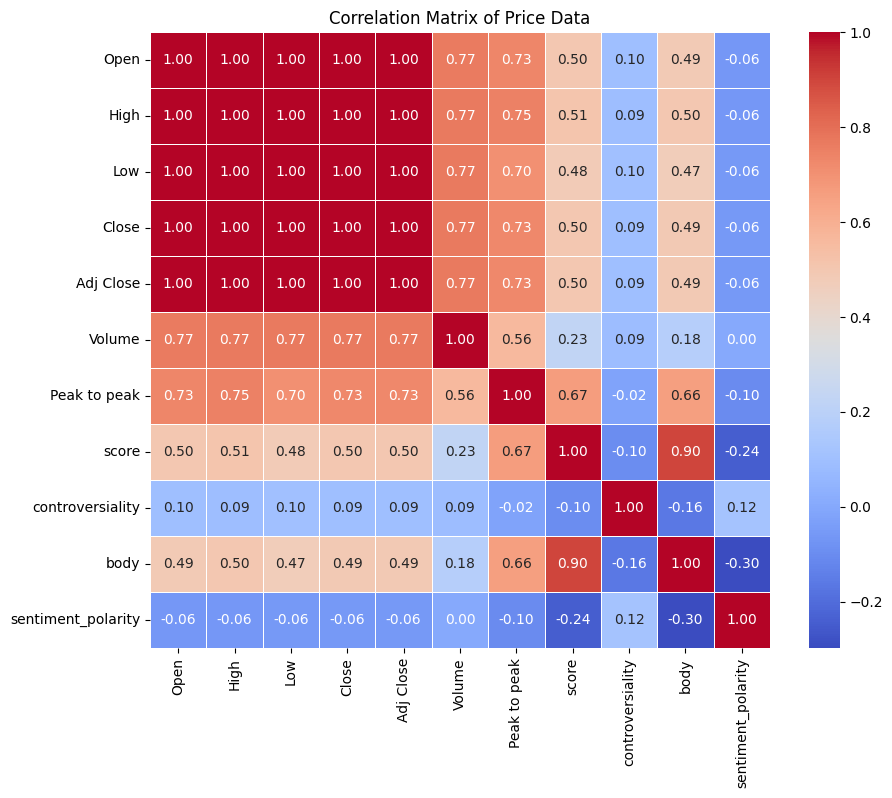

In [ ]:
# We can plot the correlation matrix to see it clearer
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Price Data")
plt.show()

We can clearly see a very high correlation between the price variables. This is likely because the price does not typically vary significantly during the same day. To avoid issues like overfitting during training, we will drop some columns that are very highly correlated with eachother.

In [ ]:
query = satext('''
    SELECT Date, Close, Volume, movement, `Peak to peak`, score, controversiality, body, sentiment_polarity
    FROM merged_df
''')

merged_df = ps.sqldf(query.text, locals())
merged_df

,Date,Close,Volume,movement,Peak to peak,score,controversiality,body,sentiment_polarity
0,2014-09-17,457.334015,21056800,down,15.752014,4662.0,0.000000,1124,0.093944
1,2014-09-18,424.440002,34483200,down,43.755981,4121.0,0.000000,1394,0.097627
2,2014-09-19,394.795990,37919700,down,43.302978,4570.0,0.000000,1483,0.094353
3,2014-09-20,408.903992,36863600,up,33.412994,2784.0,0.000000,1011,0.106974
4,2014-09-21,398.821014,26580100,down,19.244995,2609.0,0.000000,945,0.109440
...,...,...,...,...,...,...,...,...,...
1927,2019-12-27,7290.088379,22777360996,up,173.595215,3250.0,0.028634,908,0.092968
1928,2019-12-28,7317.990234,21365673026,up,112.135743,3663.0,0.043038,790,0.096074
1929,2019-12-29,7422.652832,22445257702,up,234.083008,3534.0,0.045652,920,0.086152
1930,2019-12-30,7292.995117,22874131672,down,178.516114,5426.0,0.044280,1084,0.097313


We can now replot the correlation matrix

<ipython-input-15-c167f79f3c6a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



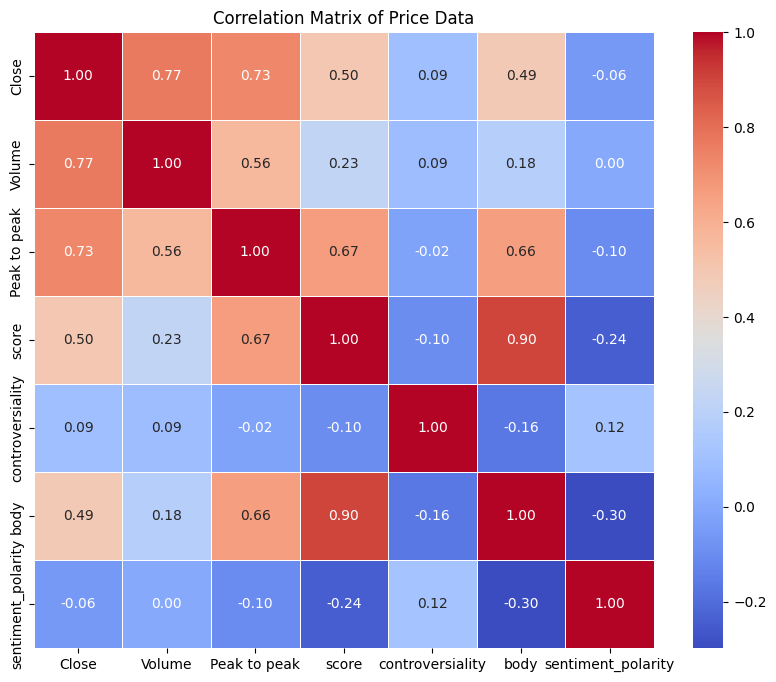

In [ ]:
# Now, let's replot the correlation matrix
correlation_matrix = merged_df.drop(columns='Date').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Price Data")
plt.show()

Now, we will begin creating other plots to understand the data even better
## 2.2 Understanding the data via plotting
### 2.2.1 Bitcoin Close Price Over Time

In [ ]:
price_df['Date'] = pd.to_datetime(price_df['Date'])

# Sorting the DataFrame by date (just to be sure it's in order)
price_df = price_df.sort_values('Date')

# Create an interactive line plot using Plotly Express
fig = px.line(price_df, x='Date', y='Close', labels={'Close': 'Bitcoin Close Price (USD)'},
              title='Bitcoin Close Price Over Time')

# Change the layout
fig.update_layout(
    xaxis=dict(title='Date'),
    yaxis=dict(title='Close Price (USD)'),
    hovermode='x',
    showlegend=True,
)

fig.show()

### 2.2.2 Bitcoin Close Price vs Sum of Reddit Scores Per Day

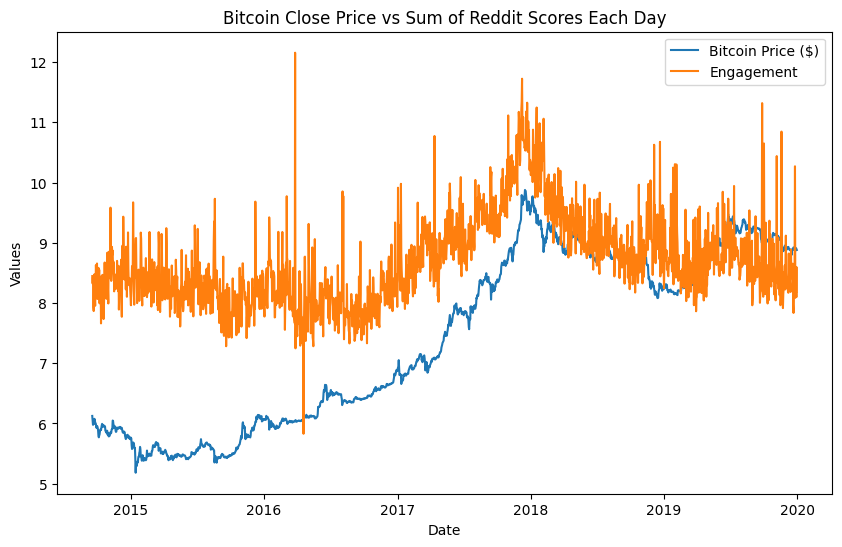

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
total_engagement_per_day = merged_df.groupby('Date')['score'].sum().reset_index()
plt.figure(figsize=(10, 6))

# Change x-axis labeling to be by year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Use log scale instead for clarity
sns.lineplot(x='Date', y=np.log(merged_df['Close']), data=merged_df, label='Bitcoin Price ($)')
sns.lineplot(x='Date', y=np.log(total_engagement_per_day['score']), data=total_engagement_per_day, label='Engagement')

plt.title('Bitcoin Close Price vs Sum of Reddit Scores Each Day')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

We can see that there is some correlation between when Bitcoin price and the sum of Reddit scores peak, which may indicate that Reddit data could be useful in predicting prices.

### 2.2.3 Sum of Scores Over Time

Text(0, 0.5, 'Sum of Scores')

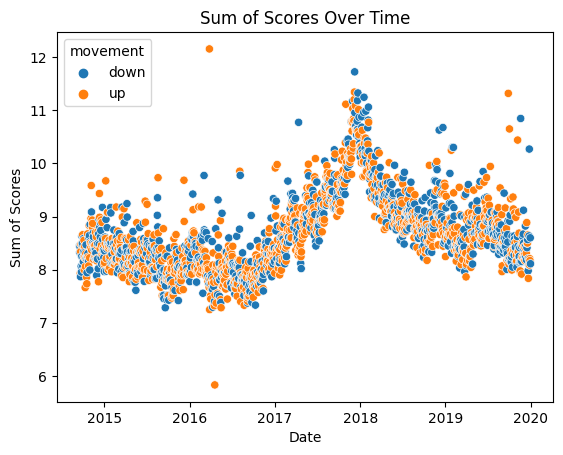

In [ ]:
up_or_down = merged_df.groupby('Date')['movement'].first().reset_index()
bar_df = total_engagement_per_day.merge(up_or_down, on = 'Date', how = 'inner')
sns.scatterplot(bar_df, x = 'Date', y = np.log(bar_df['score']), hue = 'movement')
plt.title('Sum of Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of Scores')

There does not seem to be a clear relationship between the sum of Reddit scores for a day and whether closing price moves up or down on the next day. This may indicate that attempting to predict whether price moves up or down between days could be difficult.

### 2.2.4 Number of Bitcoin Comments vs Closing Price of Next Day

Note that one outlying point is removed for sake of visualization

<ipython-input-19-a751d890b348>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



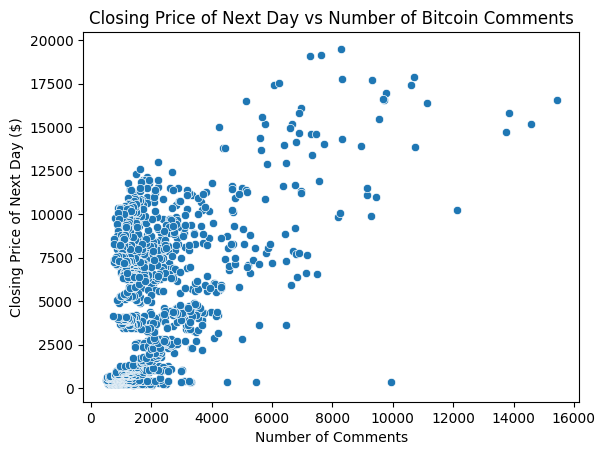

In [ ]:
new_df = merged_df[merged_df['body'] < 35000]
new_df['Next Close'] = new_df['Close'].shift(-1)
sns.scatterplot(x='body', y='Next Close', data=new_df)
plt.title('Closing Price of Next Day vs Number of Bitcoin Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Closing Price of Next Day ($)')
plt.show()

This graph shows some relationship between the number of Bitcoin comments on each day and the closing price of the next day, which could indicate that Reddit data might be usefuly in predicting prices.

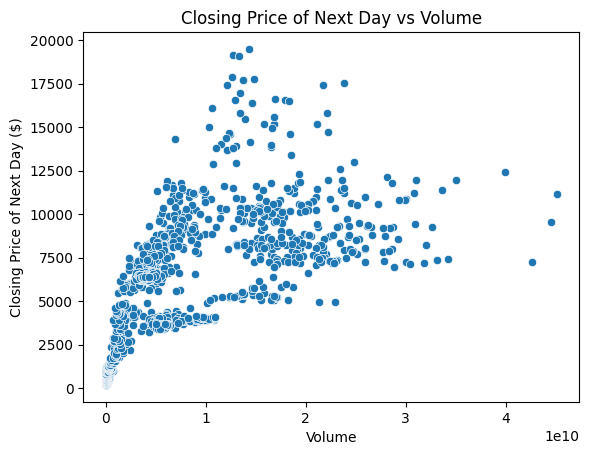

In [ ]:
new_df = merged_df
new_df['Next Close'] = new_df['Close'].shift(-1)
sns.scatterplot(x='Volume', y='Next Close', data=new_df)
plt.title('Closing Price of Next Day vs Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price of Next Day ($)')
plt.show()

This graph shows some relationship between the volume of Bitcoin traded on a day and the closing price of the next day, which could indicate that such data might be usefuly in predicting prices.

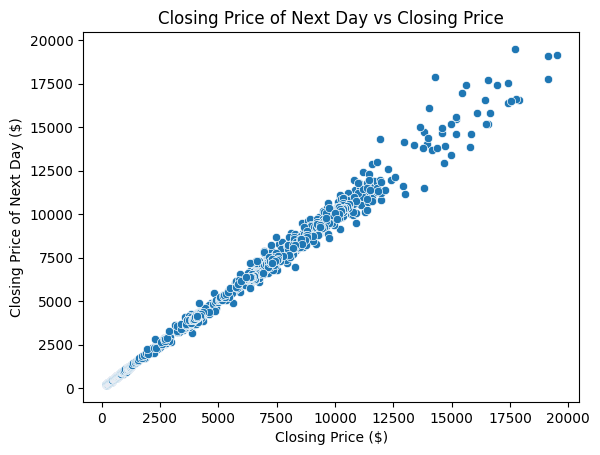

In [ ]:
new_df = merged_df
new_df['Next Close'] = new_df['Close'].shift(-1)
sns.scatterplot(x='Close', y='Next Close', data=new_df)
plt.title('Closing Price of Next Day vs Closing Price')
plt.xlabel('Closing Price ($)')
plt.ylabel('Closing Price of Next Day ($)')
plt.show()

This graph shows that closing price does not change significantly between days

# Part 3: Modelling


## 3.0 Attempt at Baseline model: Logistic Regression on Movement

We first attempt to predict whether closing price increases or decreases between a day and the next day using logistic regression. Logistic regression would serve as a basic baseline model for classification.

Logistic Regression model without hyperparameter tuning

In [ ]:
# Logistic Regression
merged_df['movement'] = merged_df['movement'].map({'up': 1, 'down': 0})
merged_df.dropna(inplace=True)
features = merged_df[['Close', 'Volume', 'Peak to peak']]
target = merged_df['movement']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
model = LogisticRegression()
model = model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy

0.5452196382428941

### 3.0.1 Hyperparameter Tuning

Test different parameter combinations

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1],
    'max_iter': [10, 50, 100, 200, 500, 1000, 2000],
}

# Create a Logistic Regressor
lr = LogisticRegression()

# Start grid search
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1],
                         'max_iter': [10, 50, 100, 200, 500, 1000, 2000]},
             scoring='neg_mean_absolute_error')

Logistic regression using the best parameters from above

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create a new Logistic Regressor
best_logistic_r = LogisticRegression(**best_params)

# Train the new regressor on the training data
best_logistic_r.fit(X_train, ravel(y_train))

# Make predictions on the scaled test data using the optimized model
y_pred_best_logistic_r = best_logistic_r.predict(X_test)

# Evaluate Logistic Regressor
accuracy = best_logistic_r.score(X_test, y_test)
accuracy

# Print the results with two decimal places
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy Score (Optimized Logistic Regression): {accuracy}')

Best Hyperparameters: {'C': 0.001, 'max_iter': 10}
Accuracy Score (Optimized Logistic Regression): 0.5452196382428941


Takeaway: Supporting our findings in the EDA, it seems that predicting whether closing price increases or decreases between days will be very difficult. This is likely because even when following a more general trend, it is possible for prices to fluctuate between days. Instead, we will shift our focus to predicting the actual closing price of Bitcoin.

## 3.1 Actual Baseline Model: Prophet

In attempting to predict Bitcoin prices, we start by using Prophet. This is because it is a simple model for time series forecasting which we can improve upon. We start our modeling with just using Bitcoin price-related data, and will incorporate the Reddit data later.

Prepare the data

In [ ]:
# Preparing Data
train_data = merged_df[:-180]
test_data = merged_df[-180:]

# Preparing training data
train = train_data[['Date', 'Close']]
train = train.rename(columns={'Date': 'ds', 'Close': 'y'})

# Preparing test data
test = test_data[['Date', 'Close']]
test = test.rename(columns={'Date': 'ds', 'Close': 'y'})

Create and fit model

In [ ]:
# Instantiating model and fitting data
model = Prophet()
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ewlg_vo/uoidddb9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ewlg_vo/cu3xhu9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6118', 'data', 'file=/tmp/tmp_ewlg_vo/uoidddb9.json', 'init=/tmp/tmp_ewlg_vo/cu3xhu9e.json', 'output', 'file=/tmp/tmp_ewlg_vo/prophet_modelt06j0zn9/prophet_model-20231211044123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a new dataframe
future = model.make_future_dataframe(periods=180)

Forecast the last 180 days

Mean Absolute Error on the test data: 3229.0074820411846
Mean Absolute Percentage Error on the test data: 0.3367858471374373


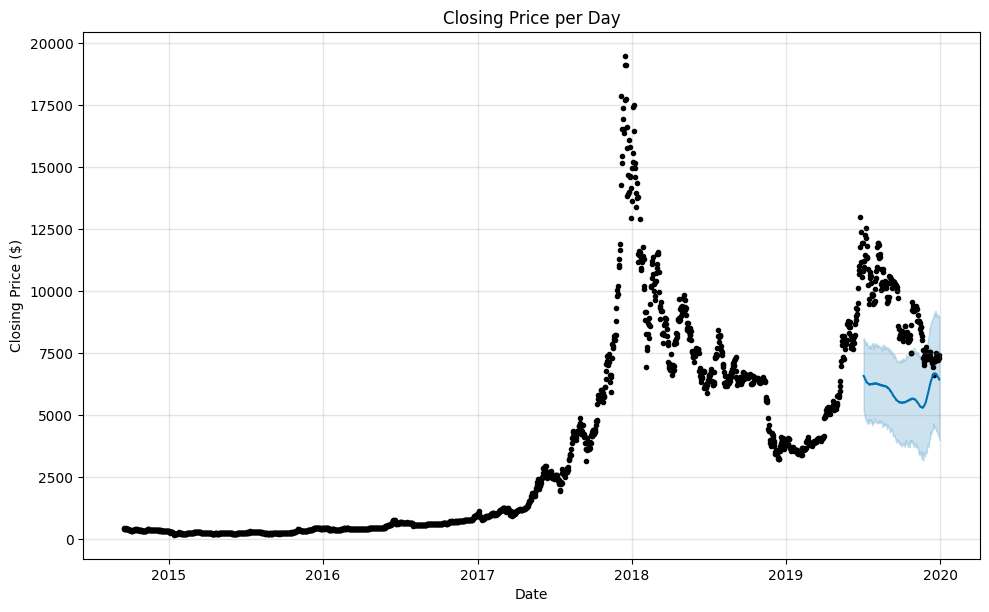

In [ ]:
# Forecast last 180 days
forecast = model.predict(future)

# Extracting predicted values for the last 180 days
forecast_last_180_days = forecast[-180:]

# Evaluate model on test data
y_true = test['y'].values
y_pred = forecast_last_180_days['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error on the test data: {mae}')
mae = mean_absolute_percentage_error(y_true, y_pred)
print(f'Mean Absolute Percentage Error on the test data: {mae}')

fig = model.plot(forecast_last_180_days)
plt.scatter(test['ds'], test['y'], color='black', label='Actual', s=9)
plt.title('Closing Price per Day')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.show()

With a MAE of 3229 and MAPE of 0.337, Prophet does quite poorly at predicting future Bitcoin closing prices. We should hopefully be able to improve from this baseline with future models.

## 3.2 Feature Engineering

### 3.2.1 Creating New Features

Before modeling, we need to add new columns which represent the Close, Volume, and Peak to peak of previous days (up to 7 days), which the models can use to make predictions.

In [ ]:
for i in range(1, 8):
  for column in ['Close', 'Volume','Peak to peak'] :
    merged_df[column + '_' + str(i)] = merged_df[column].shift(i)

merged_df = merged_df.drop(columns=['Volume', 'movement', 'Peak to peak'])
merged_df = merged_df.dropna()
merged_df.reset_index(drop=True, inplace=True)
merged_df.head(10)

,Date,Close,score,controversiality,body,sentiment_polarity,Next Close,Close_1,Volume_1,Peak to peak_1,...,Peak to peak_4,Close_5,Volume_5,Peak to peak_5,Close_6,Volume_6,Peak to peak_6,Close_7,Volume_7,Peak to peak_7
0,2014-09-24,423.204987,3174.0,0.0,1275,0.094550,411.574005,435.790985,45099500.0,45.360016,...,33.412994,394.795990,37919700.0,43.302978,424.440002,34483200.0,43.755981,457.334015,21056800.0,15.752014
1,2014-09-25,411.574005,2848.0,0.0,1161,0.094070,404.424988,423.204987,30627700.0,14.980011,...,19.244995,408.903992,36863600.0,33.412994,394.795990,37919700.0,43.302978,424.440002,34483200.0,43.755981
2,2014-09-26,404.424988,3813.0,0.0,1288,0.088542,399.519989,411.574005,26814400.0,14.052002,...,9.785980,398.821014,26580100.0,19.244995,408.903992,36863600.0,33.412994,394.795990,37919700.0,43.302978
3,2014-09-27,399.519989,5597.0,0.0,1217,0.102385,377.181000,404.424988,21460800.0,14.928985,...,45.360016,402.152008,24127600.0,9.785980,398.821014,26580100.0,19.244995,408.903992,36863600.0,33.412994
4,2014-09-28,377.181000,4815.0,0.0,1231,0.092370,375.467010,399.519989,15029300.0,9.250977,...,14.980011,435.790985,45099500.0,45.360016,402.152008,24127600.0,9.785980,398.821014,26580100.0,19.244995
5,2014-09-29,375.467010,4916.0,0.0,1577,0.104140,386.944000,377.181000,23613300.0,26.684997,...,14.052002,423.204987,30627700.0,14.980011,435.790985,45099500.0,45.360016,402.152008,24127600.0,9.785980
6,2014-09-30,386.944000,5747.0,0.0,1586,0.107496,383.614990,375.467010,32497700.0,12.971009,...,14.928985,411.574005,26814400.0,14.052002,423.204987,30627700.0,14.980011,435.790985,45099500.0,45.360016
7,2014-10-01,383.614990,3189.0,0.0,1195,0.118902,375.071991,386.944000,34707300.0,17.533997,...,9.250977,404.424988,21460800.0,14.928985,411.574005,26814400.0,14.052002,423.204987,30627700.0,14.980011
8,2014-10-02,375.071991,3715.0,0.0,1147,0.102585,359.511993,383.614990,26229400.0,10.598999,...,26.684997,399.519989,15029300.0,9.250977,404.424988,21460800.0,14.928985,411.574005,26814400.0,14.052002
9,2014-10-03,359.511993,3464.0,0.0,1269,0.097183,328.865997,375.071991,21777700.0,12.550995,...,12.971009,377.181000,23613300.0,26.684997,399.519989,15029300.0,9.250977,404.424988,21460800.0,14.928985


### 3.2.2 Preparing Features and Labels for Training

We retrive the columns added above and segment the data so that the last 180 days are testing data and all previous data is training data. We also scale the features


In [ ]:
# Prepare and scale data

# Create train_merged_df, which will be used throughout almost every model
train_merged_df = pd.DataFrame()
for i in range(1, 8):
    suffix = f'_{i}'
    train_merged_df[f'Close{suffix}'] = merged_df[f'Close{suffix}']
    train_merged_df[f'Volume{suffix}'] = merged_df[f'Volume{suffix}']
    train_merged_df[f'Peak to peak{suffix}'] = merged_df[f'Peak to peak{suffix}']


X = train_merged_df
# Predict on 'Close'
y = merged_df[['Close']]

# Split the data into training and testing sets (all data except the last 180 days)
X_train = X.iloc[:-180]
X_test = X.iloc[-180:]
y_train = y.iloc[:-180]
y_test = y.iloc[-180:]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

This is what X_train, y_train, X_test, and y_test look like now. Models now have access to Bitcoin data of the previous week when making predictions of the next day's closing price.

In [ ]:
X_train

,Close_1,Volume_1,Peak to peak_1,Close_2,Volume_2,Peak to peak_2,Close_3,Volume_3,Peak to peak_3,Close_4,...,Peak to peak_4,Close_5,Volume_5,Peak to peak_5,Close_6,Volume_6,Peak to peak_6,Close_7,Volume_7,Peak to peak_7
0,435.790985,4.509950e+07,45.360016,402.152008,2.412760e+07,9.785980,398.821014,2.658010e+07,19.244995,408.903992,...,33.412994,394.795990,3.791970e+07,43.302978,424.440002,3.448320e+07,43.755981,457.334015,2.105680e+07,15.752014
1,423.204987,3.062770e+07,14.980011,435.790985,4.509950e+07,45.360016,402.152008,2.412760e+07,9.785980,398.821014,...,19.244995,408.903992,3.686360e+07,33.412994,394.795990,3.791970e+07,43.302978,424.440002,3.448320e+07,43.755981
2,411.574005,2.681440e+07,14.052002,423.204987,3.062770e+07,14.980011,435.790985,4.509950e+07,45.360016,402.152008,...,9.785980,398.821014,2.658010e+07,19.244995,408.903992,3.686360e+07,33.412994,394.795990,3.791970e+07,43.302978
3,404.424988,2.146080e+07,14.928985,411.574005,2.681440e+07,14.052002,423.204987,3.062770e+07,14.980011,435.790985,...,45.360016,402.152008,2.412760e+07,9.785980,398.821014,2.658010e+07,19.244995,408.903992,3.686360e+07,33.412994
4,399.519989,1.502930e+07,9.250977,404.424988,2.146080e+07,14.928985,411.574005,2.681440e+07,14.052002,423.204987,...,14.980011,435.790985,4.509950e+07,45.360016,402.152008,2.412760e+07,9.785980,398.821014,2.658010e+07,19.244995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,12407.332031,3.508776e+10,1530.679688,11182.806641,3.997748e+10,2819.291992,13016.231445,4.510573e+10,2040.891602,11790.916992,...,783.714844,11011.102539,1.927165e+10,455.468750,10855.371094,2.099833e+10,690.048828,10701.691406,2.999520e+10,1050.310547
1740,11959.371094,2.992396e+10,892.531250,12407.332031,3.508776e+10,1530.679688,11182.806641,3.997748e+10,2819.291992,13016.231445,...,2040.891602,11790.916992,2.487968e+10,783.714844,11011.102539,1.927165e+10,455.468750,10855.371094,2.099833e+10,690.048828
1741,10817.155273,2.725647e+10,1379.375000,11959.371094,2.992396e+10,892.531250,12407.332031,3.508776e+10,1530.679688,11182.806641,...,2819.291992,13016.231445,4.510573e+10,2040.891602,11790.916992,2.487968e+10,783.714844,11011.102539,1.927165e+10,455.468750
1742,10583.134766,2.937859e+10,1117.125000,10817.155273,2.725647e+10,1379.375000,11959.371094,2.992396e+10,892.531250,12407.332031,...,1530.679688,11182.806641,3.997748e+10,2819.291992,13016.231445,4.510573e+10,2040.891602,11790.916992,2.487968e+10,783.714844


In [ ]:
y_train

,Close
0,423.204987
1,411.574005
2,404.424988
3,399.519989
4,377.181000
...,...
1739,11959.371094
1740,10817.155273
1741,10583.134766
1742,10801.677734


In [ ]:
X_test

,Close_1,Volume_1,Peak to peak_1,Close_2,Volume_2,Peak to peak_2,Close_3,Volume_3,Peak to peak_3,Close_4,...,Peak to peak_4,Close_5,Volume_5,Peak to peak_5,Close_6,Volume_6,Peak to peak_6,Close_7,Volume_7,Peak to peak_7
1744,11961.269531,3.079649e+10,1149.921875,10801.677734,3.101590e+10,1174.303711,10583.134766,2.937859e+10,1117.125000,10817.155273,...,1379.375000,11959.371094,2.992396e+10,892.531250,12407.332031,3.508776e+10,1530.679688,11182.806641,3.997748e+10,2819.291992
1745,11215.437500,2.592029e+10,839.505859,11961.269531,3.079649e+10,1149.921875,10801.677734,3.101590e+10,1174.303711,10583.134766,...,1117.125000,10817.155273,2.725647e+10,1379.375000,11959.371094,2.992396e+10,892.531250,12407.332031,3.508776e+10,1530.679688
1746,10978.459961,2.383848e+10,520.696289,11215.437500,2.592029e+10,839.505859,11961.269531,3.079649e+10,1149.921875,10801.677734,...,1174.303711,10583.134766,2.937859e+10,1117.125000,10817.155273,2.725647e+10,1379.375000,11959.371094,2.992396e+10,892.531250
1747,11208.550781,2.109202e+10,638.420899,10978.459961,2.383848e+10,520.696289,11215.437500,2.592029e+10,839.505859,11961.269531,...,1149.921875,10801.677734,3.101590e+10,1174.303711,10583.134766,2.937859e+10,1117.125000,10817.155273,2.725647e+10,1379.375000
1748,11450.846680,1.936904e+10,392.815429,11208.550781,2.109202e+10,638.420899,10978.459961,2.383848e+10,520.696289,11215.437500,...,839.505859,11961.269531,3.079649e+10,1149.921875,10801.677734,3.101590e+10,1174.303711,10583.134766,2.937859e+10,1117.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,7275.155762,2.155951e+10,136.028809,7322.532227,2.299162e+10,266.187988,7355.628418,2.783179e+10,329.983887,7511.588867,...,350.854004,7191.158691,1.931255e+10,110.490234,7218.816406,2.263382e+10,171.797852,7202.844238,2.590460e+10,305.220703
1920,7238.966797,2.278701e+10,187.916015,7275.155762,2.155951e+10,136.028809,7322.532227,2.299162e+10,266.187988,7355.628418,...,329.983887,7511.588867,2.313454e+10,350.854004,7191.158691,1.931255e+10,110.490234,7218.816406,2.263382e+10,171.797852
1921,7290.088379,2.277736e+10,173.595215,7238.966797,2.278701e+10,187.916015,7275.155762,2.155951e+10,136.028809,7322.532227,...,266.187988,7355.628418,2.783179e+10,329.983887,7511.588867,2.313454e+10,350.854004,7191.158691,1.931255e+10,110.490234
1922,7317.990234,2.136567e+10,112.135743,7290.088379,2.277736e+10,173.595215,7238.966797,2.278701e+10,187.916015,7275.155762,...,136.028809,7322.532227,2.299162e+10,266.187988,7355.628418,2.783179e+10,329.983887,7511.588867,2.313454e+10,350.854004


In [ ]:
y_test

,Close
1744,11215.437500
1745,10978.459961
1746,11208.550781
1747,11450.846680
1748,12285.958008
...,...
1919,7238.966797
1920,7290.088379
1921,7317.990234
1922,7422.652832


## 3.3 Supervised Learning Models

### 3.3.1 Lasso Regression

To improve Prophet, we first try lasso regression. Since the model is now able to make predictions based on data from the previous week (unlike Prophet, which did not), it is likely to perform better than our baseline. Lasso regression also has the benefit of reducing overfitting with L1 regularization.

#### 3.3.1.0 Regular Lasso Regression

Perform lasso regression before hyperparameter tuning

In [ ]:
# Create a Lasso regressor
lasso_regressor = Lasso(alpha=1.0, random_state=439)

# Train the regressor on the training data
lasso_regressor.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_lasso = lasso_regressor.predict(X_test_scaled)

# Evaluate Lasso
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)

print(f'Mean Absolute Error (Lasso): {mae_lasso}')
print(f'Mean Absolute Percentage Error (Lasso): {mape_lasso}')

Mean Absolute Error (Lasso): 222.01501923101495
Mean Absolute Percentage Error (Lasso): 0.023601413350010716


Show predictions on last 180 days

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': y_test.reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'], mode='lines', name='Actual', line=dict(color='red')))

# Plotting Lasso predicted values
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_lasso)), y=y_pred_lasso, mode='lines', name='Lasso', line=dict(color='blue')))

# Change layout
fig.update_layout(
    title='Model Predictions vs Actual Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

#### 3.3.1.1 Hyperparameter Tuning

Determine best combination of parameters

In [ ]:
# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Create a Lasso Regressor
lr = Lasso(random_state=439)

# Start grid search (Note: takes some time)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_scaled, ravel(y_train))

GridSearchCV(cv=5, estimator=Lasso(random_state=439), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'max_iter': [100, 500, 1000],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_absolute_error')

Perform lasso regression using best parameters from above

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create a new Lasso Regressor
best_lr = Lasso(**best_params, random_state=439)

# Train the new regressor on the training data
best_lr.fit(X_train_scaled, ravel(y_train))

# Make predictions on the scaled test data using the optimized model
y_pred_best_lr = best_lr.predict(X_test_scaled)

# Evaluate the new optimized Lasso regressor
mae_best_lr = mean_absolute_error(y_test, y_pred_best_lr)
mape_best_lr = mean_absolute_percentage_error(y_test, y_pred_best_lr)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Absolute Error (Optimized Lasso): {mae_best_lr}')
print(f'Mean Absolute Percentage Error (Optimized Lasso): {mape_best_lr}')

Best Hyperparameters: {'alpha': 0.1, 'max_iter': 100, 'tol': 0.01}
Mean Absolute Error (Optimized Lasso): 227.04267979295534
Mean Absolute Percentage Error (Optimized Lasso): 0.024236310260043584


Show predictions on last 180 days

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': y_test.reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'], mode='lines', name='Actual', line=dict(color='red')))

# Plotting Lasso predicted values
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_lr)), y=y_pred_best_lr, mode='lines', name='Lasso', line=dict(color='blue')))

# Change layout
fig.update_layout(
    title='Optimized Lasso Predictions vs Actual Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

We can see that with an MAE of 227 and MAPE of 0.0242, lasso regression performs better than Prophet. However, based on the graph above, it seems to simply be predicting the closing price of the previous day.

### 3.3.2 Ridge Regression

Based on the correlation matrix from our EDA, we know there is still some correlation between the features. We now try ridge regression, which should counteract any colinearity as well as reduce overfitting through L2 regularization.


#### 3.3.2.0 Regular Ridge Regression

Perform ridge regression before hyperparameter tuning

In [ ]:
# Create a Ridge regressor
ridge_regressor = Ridge(alpha=1.0, random_state=439)

# Train the regressor on the training data
ridge_regressor.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_ridge = ridge_regressor.predict(X_test_scaled)

# Evaluate Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f'Mean Absolute Error (Ridge): {mae_ridge}')
print(f'Mean Absolute Percentage Error (Ridge): {mape_ridge}')

Mean Absolute Error (Ridge): 285.290904143002
Mean Absolute Percentage Error (Ridge): 0.031098094930537865


Show predictions for the last 180 days

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': y_test.reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'], mode='lines', name='Actual', line=dict(color='red')))

# Plotting Ridge predicted values
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_ridge)), y=y_pred_ridge.flatten(), mode='lines', name='Ridge', line=dict(color='orange')))

# Change layout
fig.update_layout(
    title='Model Predictions vs Actual Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

#### 3.3.2.2 Hyperparameter Tuning

Determine the best combination of parameters

In [ ]:
# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# Create a Ridge Regressor
rr = Ridge()

# Start grid search
grid_search = GridSearchCV(rr, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_scaled, ravel(y_train))

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'max_iter': [100, 500, 1000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr']},
             scoring='neg_mean_absolute_error')

Perform ridge regression using the best parameters from above

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create a new Ridge Regressor
best_rr = Ridge(**best_params, random_state=439)

# Train the new regressor on the training data
best_rr.fit(X_train_scaled, ravel(y_train))

# Make predictions on the scaled test data using the optimized model
y_pred_best_rr = best_rr.predict(X_test_scaled)

# Evaluate the performance of the optimized Ridge regressor
mae_best_rr = mean_absolute_error(y_test, y_pred_best_rr)
mape_best_rr = mean_absolute_percentage_error(y_test, y_pred_best_rr)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Absolute Error (Optimized Ridge): {mae_best_rr}')
print(f'Mean Absolute Percentage Error (Optimized Ridge): {mape_best_rr}')

Best Hyperparameters: {'alpha': 0.001, 'max_iter': 100, 'solver': 'svd'}
Mean Absolute Error (Optimized Ridge): 288.48226876931284
Mean Absolute Percentage Error (Optimized Ridge): 0.031314403290185304


Show predictions for the last 180 days

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': y_test.reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'], mode='lines', name='Actual', line=dict(color='red')))

# Plotting Lasso predicted values
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_lr)), y=y_pred_best_rr, mode='lines', name='Ridge', line=dict(color='orange')))

# Change layout
fig.update_layout(
    title='Optimized Ridge Predictions vs Actual Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

With an MAE of 288 and MAPE of 0.0313, ridge regression performs worse than lasso regression based on metrics. However, looking at the graph, it does not seem to simply be predicting the previous day's closing price.

### 3.3.3 Random Forest Regression

We now try random forest regression, testing out the approach of using ensemble learning. Additionally, we want to try a model which is more interpretable.

#### 3.3.3.0 Regular Random Forest Regression

Perform random forest regression before hyperparameter tuning

In [ ]:
# Create a Random Forest regressor
rf = RandomForestRegressor(random_state=439)

# Train the regressor on the training data
rf.fit(X_train_scaled, ravel(y_train))

# Make predictions on the scaled test data
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f'Mean Absolute Error (Random Forest): {mae_rf}')
print(f'Mean Absolute Percentage Error (Random Forest): {mape_rf}')

Mean Absolute Error (Random Forest): 304.0488239232226
Mean Absolute Percentage Error (Random Forest): 0.03288823994601791


Show predictions on last 180 days

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': y_test.reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'], mode='lines', name='Actual', line=dict(color='red')))

# Plotting Random Forest predicted values
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_rf)), y=y_pred_rf, mode='lines', name='Random Forest', line=dict(color='green')))

# Change layout
fig.update_layout(
    title='RF Predictions vs Actual Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

#### 3.3.3.1 Hyperparameter Tuning

Determine the best combination of parameters

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [10, 20],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [4, 8]
}

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Start grid search (Note: takes some time)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_scaled, ravel(y_train))

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [4, 8],
                         'min_samples_split': [10, 15],
                         'n_estimators': [10, 20]},
             scoring='neg_mean_absolute_error')

Perform random forest regression using the best parameters from above

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create a new Random Forest Regressor
best_rf = RandomForestRegressor(**best_params, random_state=439)

# Train the new regressor on the training data
best_rf.fit(X_train_scaled, ravel(y_train))

# Make predictions on the scaled test data using the optimized model
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate the new optimized Random Forest
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mape_best_rf = mean_absolute_percentage_error(y_test, y_pred_best_rf)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Absolute Error (Optimized Random Forest): {mae_best_rf}')
print(f'Mean Absolute Percentage Error (Optimized Random Forest): {mape_best_rf}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
Mean Absolute Error (Optimized Random Forest): 254.41186796702584
Mean Absolute Percentage Error (Optimized Random Forest): 0.027821529791405463


Show predictions on the last 180 days

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': y_test.reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'], mode='lines', name='Actual', line=dict(color='red')))

# Plotting Optimized Random Forest predicted values
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_rf)), y=y_pred_best_rf, mode='lines', name='Random Forest', line=dict(color='green')))

# Change layout
fig.update_layout(
    title='Optimized RF Predictions vs Actual Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

With an MAE of 254 and a MAPE of 0.0278, random forest regression performs better than ridge regression and worse than lasso regression in terms of metrics. However, based on the graph shown, it does not seem to just predict the previous day's closing price like lasso regression. Thus, it is in our opinion the best model so far.

### 3.3.4 Long Short-Term Memory (LSTM)

We now try an LSTM model, since LSTMs are well-suited for sequential data. Although it will not be very interpretable, we are hoping the additional complexity of the model will allow it to outperform the other models.

#### 3.3.4.1 Prepare data

Prepare data slightly differently for the LSTM

In [ ]:
# Prepare and scale data

# Create train_merged_df, which will be used throughout almost every model
train_merged_df = pd.DataFrame()
for i in range(7, 0, -1):
    suffix = f'_{i}'
    train_merged_df[f'Close{suffix}'] = merged_df[f'Close{suffix}']


X = train_merged_df
# Predict on 'Close'
y = merged_df[['Close']]

# Split the data into training and testing sets (all data except the last 180 days)
X_train = X.iloc[:-180]
X_test = X.iloc[-180:]
y_train = y.iloc[:-180]
y_test = y.iloc[-180:]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Convert the data to Pytorch tensors and use DataLoaders

In [ ]:
# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train_scaled)
y_train = torch.FloatTensor(y_train_scaled)
dataset = TensorDataset(X_train, y_train)
batch_size = 16
train_loader = DataLoader(dataset, batch_size=batch_size)
train_loader_2 = DataLoader(dataset, batch_size=1)

# Convert the data to PyTorch tensors
X_test = torch.Tensor(X_test_scaled)
y_test = torch.Tensor(y_test_scaled)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=1)

#### 3.3.4.2 Define model

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(LSTMModel, self).__init__()

        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # LSTM Cell
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Linear layer
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # Initialize hidden state with zeros
        h_0 = torch.zeros(self.num_layers, x.size(0),  self.hidden_dim)

        # Initialize cell state
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)

        out, (h, c) = self.lstm(x, (h_0, c_0))
        out = self.linear(out[:, -1, :])
        # out = self.linear(h[-1,:,:])
        return out

#### 3.3.4.3 Hyperparameter Tuning

In [ ]:
param_grid = {'learning rate':[0.0001, 0.005, 0.001], 'betas':[(0.99, 0.999), (0.9,0.99) , (0.9, 0.9)], 'hidden_dim':[30, 60, 90]}
pgrid = ParameterGrid(param_grid)
grid = list(pgrid)
lowest_loss = 1000000000
best = []
for params in grid:
  model = LSTMModel(1, params['hidden_dim'], 3)
  loss_function = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=params['learning rate'], betas=params['betas'])

  # Train the model
  epochs = 15
  for epoch in range(epochs):
      t_loss = 0
      for i, data in enumerate(train_loader):
          inputs, labels = data

          optimizer.zero_grad()

          y_pred = model(inputs.unsqueeze(2))

          single_loss = loss_function(y_pred, labels)
          t_loss += single_loss.item()
          single_loss.backward()
          optimizer.step()

  if (t_loss < lowest_loss):
        best = params
        print(best, t_loss)
        lowest_loss = t_loss

{'betas': (0.99, 0.999), 'hidden_dim': 30, 'learning rate': 0.0001} 0.3603781290756274
{'betas': (0.99, 0.999), 'hidden_dim': 60, 'learning rate': 0.0001} 0.1569441087276715
{'betas': (0.9, 0.99), 'hidden_dim': 60, 'learning rate': 0.0001} 0.15023211686663984


In [ ]:
# Instantiate the model, define loss and optimization
model = LSTMModel(1, best['hidden_dim'], 3)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=best['learning rate'], betas=best['betas'])

# Train the model
losses = []
epochs = 100
for epoch in range(epochs):
    t_loss = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data

        optimizer.zero_grad()

        y_pred = model(inputs.unsqueeze(2))

        single_loss = loss_function(y_pred, labels)
        t_loss += single_loss.item()
        single_loss.backward()
        optimizer.step()

    print(f'Epoch {epoch}, Loss: {t_loss}')
    losses.append(t_loss)

Epoch 0, Loss: 4.153077249223998
Epoch 1, Loss: 4.390703856595792
Epoch 2, Loss: 4.396863932726774
Epoch 3, Loss: 4.3467644800002745
Epoch 4, Loss: 4.272975563782893
Epoch 5, Loss: 4.1625136358852615
Epoch 6, Loss: 3.981339078253768
Epoch 7, Loss: 3.6573649727070006
Epoch 8, Loss: 3.070070803456474
Epoch 9, Loss: 2.101189614542818
Epoch 10, Loss: 0.9249140963573836
Epoch 11, Loss: 0.26083349237068276
Epoch 12, Loss: 0.19664000571174256
Epoch 13, Loss: 0.1914886011741146
Epoch 14, Loss: 0.1804068359683697
Epoch 15, Loss: 0.1725422103195342
Epoch 16, Loss: 0.16482900521623378
Epoch 17, Loss: 0.15730120739112863
Epoch 18, Loss: 0.15024195854337563
Epoch 19, Loss: 0.14382233859840454
Epoch 20, Loss: 0.13808732292869763
Epoch 21, Loss: 0.13301181819929297
Epoch 22, Loss: 0.12853669991147854
Epoch 23, Loss: 0.12458942611715429
Epoch 24, Loss: 0.12109748010615817
Epoch 25, Loss: 0.11799731730809526
Epoch 26, Loss: 0.11524010809557694
Epoch 27, Loss: 0.11279356266312845
Epoch 28, Loss: 0.11064

Test model on last 180 days

In [ ]:
# Test the model

test_loss = 0.0
predictions, true_labels = [], []
with torch.no_grad():
    for seq, labels in test_loader:
        y_pred = model(seq.unsqueeze(2))
        test_loss += loss_function(y_pred, labels).item()
        predictions.append(y_scaler.inverse_transform(y_pred.reshape(-1, 1)).item())
        true_labels.append(y_scaler.inverse_transform(labels.reshape(-1, 1)).item())

mae = mean_absolute_error(true_labels, predictions)
mape = mean_absolute_percentage_error(true_labels, predictions)

print(f'Test Loss: {test_loss}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Test Loss: 0.22752365977225963
Mean Absolute Error (MAE): 559.1882406257253
Mean Absolute Percentage Error (MAPE): 0.06288464497585182


Show predictions on last 180 days

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': merged_df[['Close']].iloc[-180:].reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'], mode='lines', name='Actual', line=dict(color='red')))

# Plotting LSTM
fig.add_trace(go.Scatter(x=np.arange(len(predictions)), y=predictions, mode='lines', name='LSTM', line=dict(color='black')))

# Change layout
fig.update_layout(
    title='LSTM Predictions vs Actual Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

With a MAE of 559 and MAPE of 0.0629, the LSTM performs worse than lasso, ridge, and random forest regression. Based on the graph, it seems that its predictions are not very accurate as well.

We can now plot all models' predictions at the same time

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': merged_df[['Close']].iloc[-180:].reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'], mode='lines', name='Actual', line=dict(color='red')))

# Plotting Lasso
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_lr)), y=y_pred_best_lr, mode='lines', name='Lasso', line=dict(color='blue')))

# Plotting Ridge
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_rr)), y=y_pred_best_rr, mode='lines', name='Ridge', line=dict(color='orange')))

# Plotting Random Forest
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_rf)), y=y_pred_best_rf, mode='lines', name='Random Forest', line=dict(color='green')))

# Plotting LSTM
fig.add_trace(go.Scatter(x=np.arange(len(predictions)), y=predictions, mode='lines', name='LSTM', line=dict(color='black')))

# Change layout
fig.update_layout(
    title='All Model Predictions vs Actual Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': merged_df[['Close']].iloc[-180:].reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'].shift(1), mode='lines', name='Actual', line=dict(color='red')))

# Plotting Lasso
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_lr)), y=y_pred_best_lr, mode='lines', name='Lasso', line=dict(color='blue')))

# Plotting Ridge
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_rr)), y=y_pred_best_rr, mode='lines', name='Ridge', line=dict(color='orange')))

# Plotting Random Forest
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_rf)), y=y_pred_best_rf, mode='lines', name='Random Forest', line=dict(color='green')))

# Plotting LSTM
fig.add_trace(go.Scatter(x=np.arange(len(predictions)), y=predictions, mode='lines', name='LSTM', line=dict(color='black')))

# Change layout
fig.update_layout(
    title='All Model Predictions vs Adjusted Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

### 3.3.4 Adding Reddit Data to Random Forest


Based on our time series forecasting above, random forest seems to be the best model at predicting Bitcoin closing prices. Although lasso regression performed better in terms of metrics, it seems to simply predict the last day's closing price. We now try to add Reddit data as features in order to improve the random forest model.

Add sentiment polarity, total score, number of comments, and controversiality as features

In [ ]:
train_merged_df['sentiment_polarity'] = merged_df['sentiment_polarity']
train_merged_df['score'] = merged_df['score']
train_merged_df['body'] = merged_df['body']
train_merged_df['controversiality'] = merged_df['controversiality']

#### 3.3.4.1 Preparing Features and Labels for Training

In [ ]:
X = train_merged_df
# Predict on 'Close'
y = merged_df[['Close']]

# Split the data into training and testing sets (all data except the last 30 days)
X_train = X.iloc[:-180]
X_test = X.iloc[-180:]
y_train = y.iloc[:-180]
y_test = y.iloc[-180:]

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 3.3.4.2 Hyperparameter Tuning

Determine the best parameters

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20],
    'max_depth': [10, 20],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [4, 8]
}

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Start grid search (Note: takes some time)
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_scaled, ravel(y_train))

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [4, 8],
                         'min_samples_split': [10, 15],
                         'n_estimators': [10, 20]},
             scoring='neg_mean_absolute_error')

Perform random forest regression using the best parameters from above

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create a new Random Forest Regressor
best_rf = RandomForestRegressor(**best_params, random_state = 439)

# Train the new regressor on the training data
best_rf.fit(X_train_scaled, ravel(y_train))

# Make predictions on the scaled test data using the optimized model
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate the new optimized Random Forest
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mape_best_rf = mean_absolute_percentage_error(y_test, y_pred_best_rf)

# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Mean Absolute Error (Optimized Random Forest): {mae_best_rf}')
print(f'Mean Absolute Percentage Error (Optimized Random Forest): {mape_best_rf}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
Mean Absolute Error (Optimized Random Forest): 251.27785549386826
Mean Absolute Percentage Error (Optimized Random Forest): 0.026784243084637064


Show predictions on last 180 days

In [ ]:
# Create a DataFrame from actual values
actual_df = pd.DataFrame({'Actual': y_test.reset_index()['Close']})

fig = go.Figure()

# Plotting actual values
fig.add_trace(go.Scatter(x=actual_df.index, y=actual_df['Actual'], mode='lines', name='Actual', line=dict(color='red')))

# Plotting Optimized Random Forest predicted values
fig.add_trace(go.Scatter(x=np.arange(len(y_pred_best_rf)), y=y_pred_best_rf, mode='lines', name='Random Forest', line=dict(color='green')))

# Change layout
fig.update_layout(
    title='Best RF Predictions (with Reddit Insights) vs Actual Closing Price',
    xaxis_title='Day (starting from test data split, July 5th, 2019)',
    yaxis_title='Closing Price ($)',
    legend=dict(x=1, y=0.5, traceorder='normal', orientation='v'),
    autosize=False,
    width=1000,
    height=600,
)

fig.show()

With a MAE of 251 and MAPE of 0.0268, the addition of Reddit data improves the random forest regressor's performance very marginally from its previous MAE of 254 and MAPE of 0.0278.

# Takeaways

Based on the work above, it seems quite difficult to accurately predict the closing Bitcoin prices of future days, even with Bitcoin data from the prior week. None of the models produced very accurate predictions, and lasso regression resulted in predictions very similar to the previous day's closing price. In the end, we found random forest to be the most effective at predicting Bitcoin prices, and the addition of data on Reddit comments from the previous day, including sentiment analysis of such comments, improved the random forest regressor's preformance very slightly. Ultimately, we did not need to balance much of a tradeoff between interpretability and complexity, since the model which performed the best (random forest) simply ensembles multiple decision trees and so is very interpretable. It is possible that with additional work and better models, more hyperparameters tested, and a different random seed, more accurate predictions could be made.